In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [12]:
df = pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [14]:
print(df.describe())

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

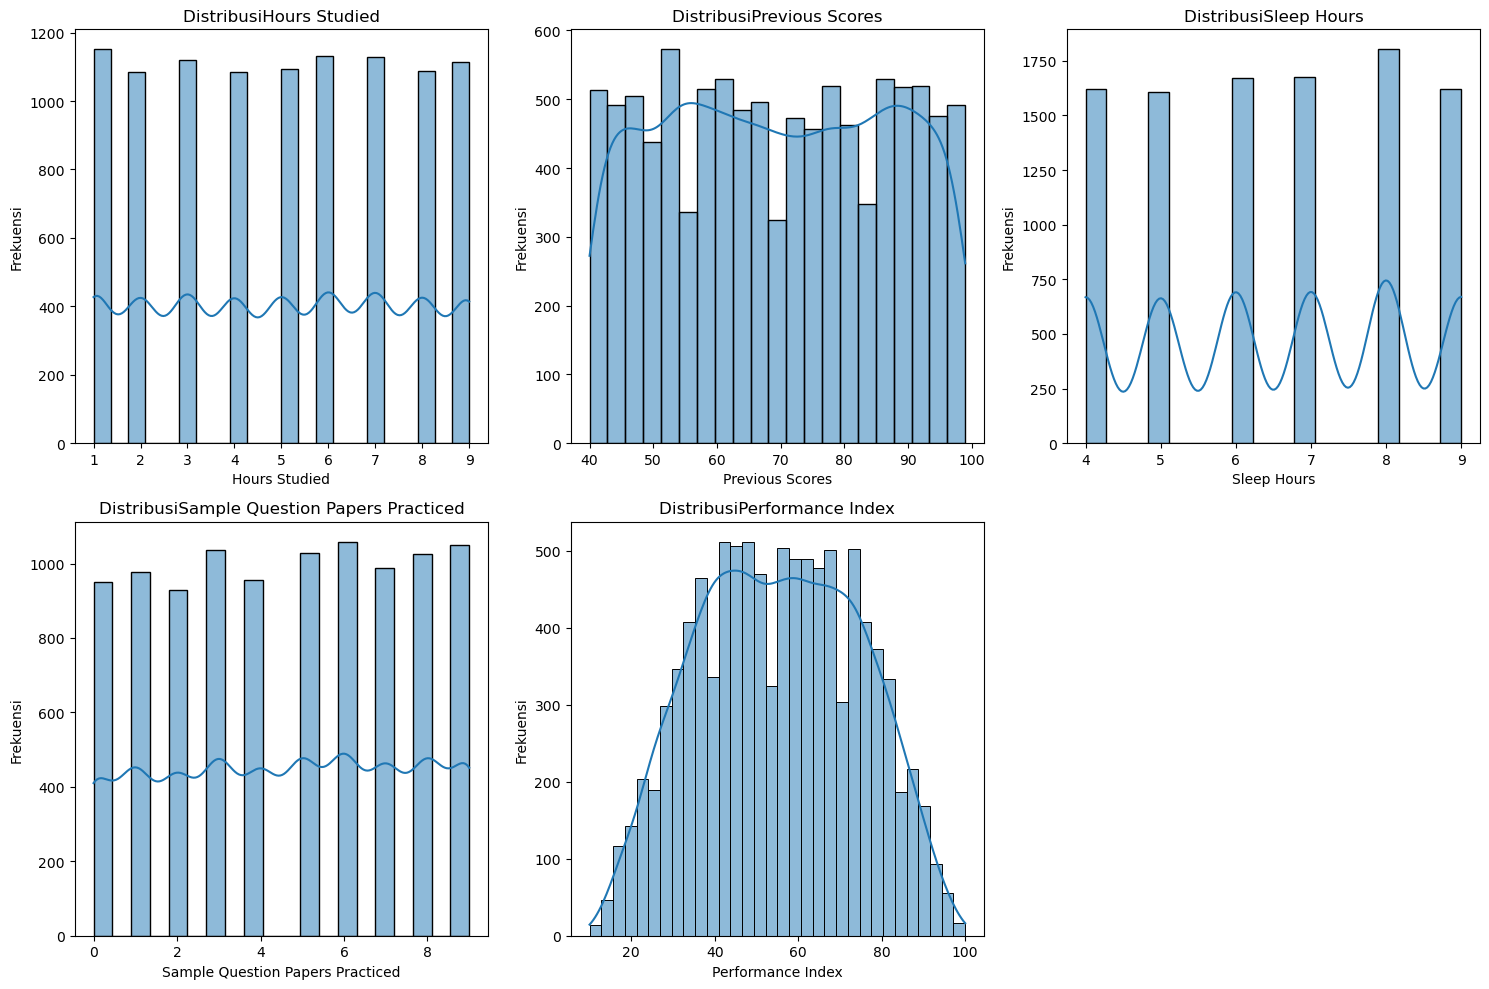

In [16]:
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))

for i, column in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], kde = True)
    plt.title(f"Distribusi{column}")
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

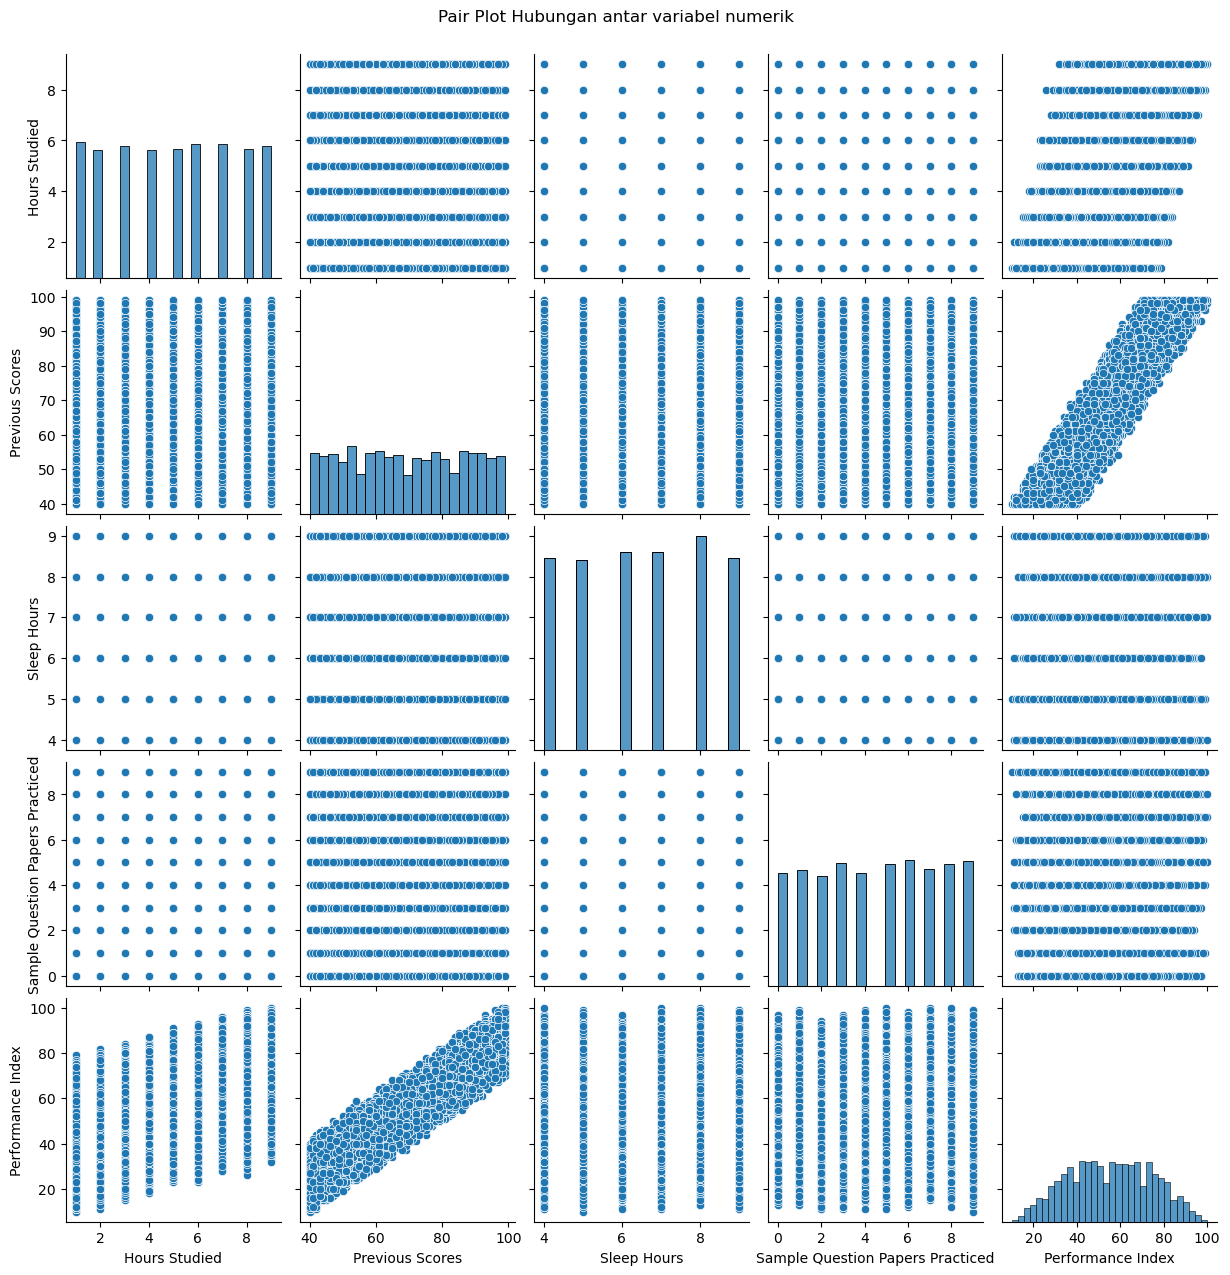

In [17]:
pair = df.select_dtypes(include=np.number)
sns.pairplot(pair)
plt.suptitle("Pair Plot Hubungan antar variabel numerik", y = 1.02)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

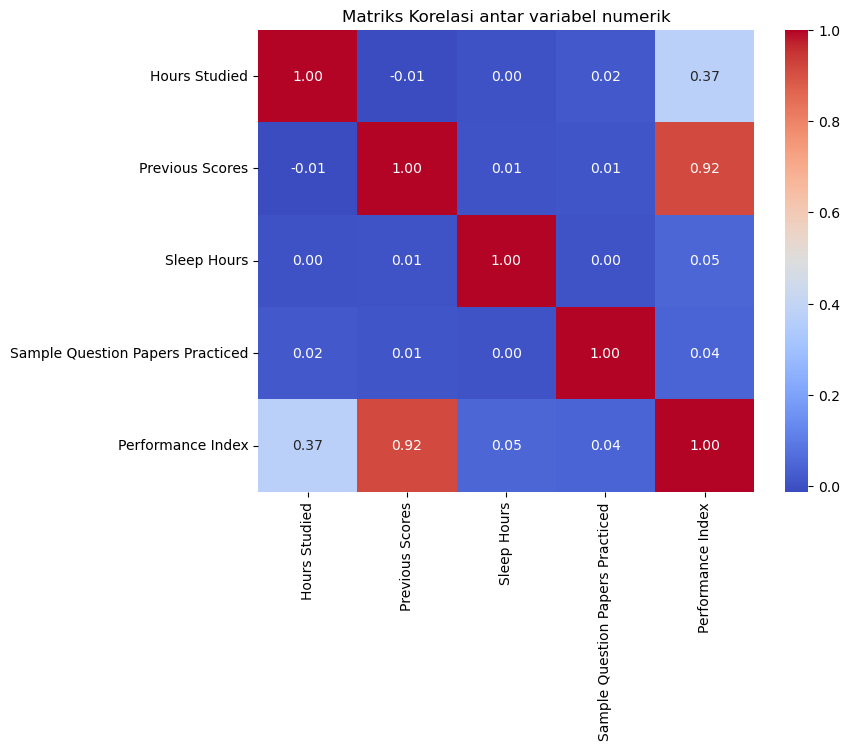

In [20]:
plt.figure(figsize=(8,6))
correlation_matrix = pair.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Matriks Korelasi antar variabel numerik")
plt.show

In [21]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [30]:
X = df.drop('Performance Index', axis = 1)
y = df['Performance Index']

print(f"\nJumlah Fitur (x): {X.shape[1]} (Kolom: {X.columns.tolist()})")
print(f"Jumlah Sampel: {X.shape[0]}")
print(f"target (y): 'Performance Index'")


Jumlah Fitur (x): 5 (Kolom: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced'])
Jumlah Sampel: 10000
target (y): 'Performance Index'


In [32]:
model = LinearRegression()
model.fit(x,y)
print("Model regresi linear berhasil dilatih pada seluruh dataset")

Model regresi linear berhasil dilatih pada seluruh dataset


In [35]:
coeff = pd.DataFrame({'Figure': X.columns, 'Coeffiecient': model.coef_})
print("Koeffiesien.Model")
print(coeff)
print(f"\nIntercept (Konstanta): {model.intercept_:.2f}")

Koeffiesien.Model
                             Figure  Coeffiecient
0                     Hours Studied      2.852982
1                   Previous Scores      1.018434
2        Extracurricular Activities      0.612898
3                       Sleep Hours      0.480560
4  Sample Question Papers Practiced      0.193802

Intercept (Konstanta): -34.08


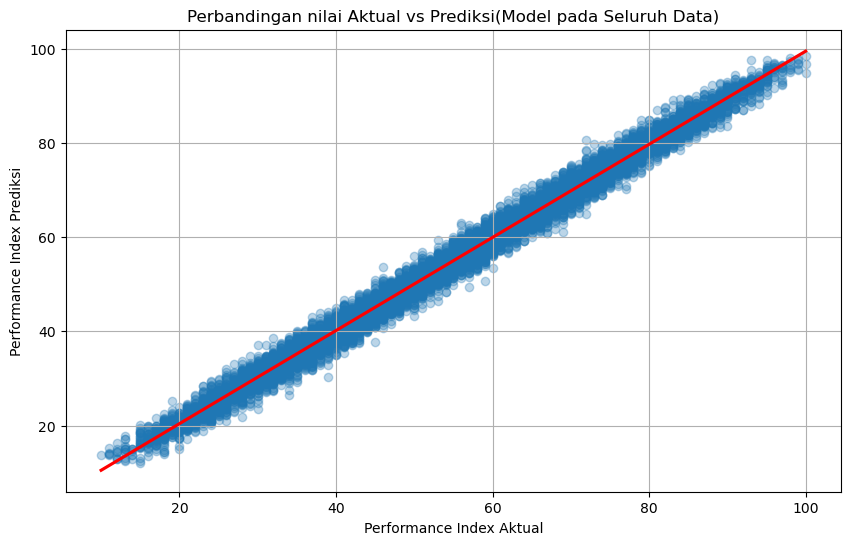

In [42]:
full_data = model.predict(X)

plt.figure(figsize=(10,6))
sns.regplot(x = y, y = full_data, scatter_kws = {'alpha':0.3}, line_kws = {'color': 'red'})
plt.xlabel("Performance Index Aktual")
plt.ylabel("Performance Index Prediksi")
plt.title("Perbandingan nilai Aktual vs Prediksi(Model pada Seluruh Data)")
plt.grid(True)
plt.show()